# PageRank

This notebook illustrates the classification of the nodes of a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/classification.html), based on the labels of a few nodes.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import sknetwork as skn

In [2]:
COLORS = np.array(['r', 'b', 'g', 'c', 'm', 'y'])

## Undirected graphs

**Loading**

In [3]:
graph = skn.data.KarateClub()
adjacency = graph.adjacency
labels_true = graph.labels

**Classification**

In [4]:
seeds = {i: labels_true[i] for i in [0, 33]}

In [5]:
pagerank = skn.classification.PageRankClassifier()
labels_pred = pagerank.fit_transform(adjacency, seeds)

In [6]:
precision = np.round(np.mean(labels_pred == labels_true), 2)
precision

0.97

**Visualization**

In [7]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [8]:
pos = nx.spring_layout(graph)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


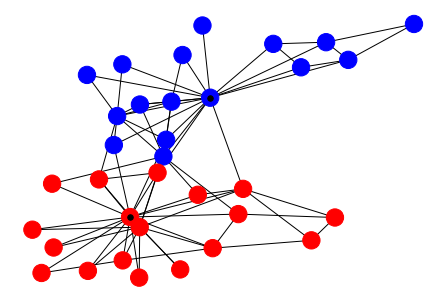

In [9]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels_pred])
nx.draw_networkx_nodes(graph, pos, nodelist=list(seeds.keys()), node_color='k', node_size=30)

## Directed graphs

**Loading**

In [10]:
graph = skn.data.Painters()
adjacency = graph.adjacency
names = graph.names

**Classification**

In [11]:
rembrandt = 5
klimt = 6
cezanne = 11
seeds = {cezanne: 0, rembrandt: 1, klimt: 2}

In [12]:
pagerank = skn.classification.PageRankClassifier()
labels = pagerank.fit_transform(adjacency, seeds)

**Visualization**

In [13]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

In [14]:
pos = nx.spring_layout(graph)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


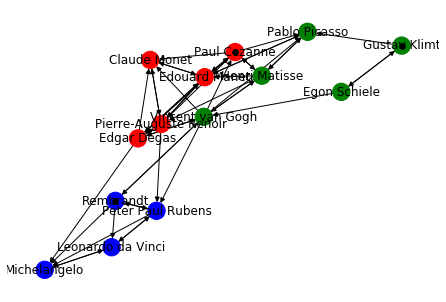

In [16]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels], labels={i:name for i, name in enumerate(names)})
nx.draw_networkx_nodes(graph, pos, nodelist=list(seeds.keys()), node_color='k', node_size=30)

## Bipartite graphs

**Loading**

In [17]:
graph = skn.data.MovieActor()
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

**Ranking**

In [18]:
inception = 0
drive = 3
budapest = 8

In [19]:
seeds = {inception: 0, drive: 1, budapest: 2}

In [20]:
bipagerank = skn.classification.BiPageRankClassifier()
labels = bipagerank.fit_transform(biadjacency, seeds)

In [21]:
[movies[i] for i, l in enumerate(labels) if l == seeds[budapest]]

['The Grand Budapest Hotel',
 'Aviator',
 '007 Spectre',
 'Inglourious Basterds',
 'Midnight In Paris',
 'Murder on the Orient Express',
 'Fantastic Beasts 2']